<a href="https://colab.research.google.com/github/Arnav1511/automobile.analysis/blob/main/MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing drive library and mounting gdrive

In [10]:
from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Mounting the dataset

In [11]:
import os
os.environ['AUTOMOBILEDATA_CONFIG_DIR']='/content/gdrive/MyDrive/Automobiledata'

In [21]:
%cd /content/gdrive/MyDrive/Automobiledata

/content/gdrive/MyDrive/Automobiledata


Listing all the contents

In [22]:
!ls


Automobiledata.csv


In [23]:
!pwd


/content/gdrive/MyDrive/Automobiledata


Downloading dataset from Kaggle

In [24]:
!ls

Automobiledata.csv


Unzipping the dataset

In [25]:
!ls


Automobiledata.csv


Creating dataframe from the dataset

In [36]:
import pandas as pd
df=pd.read_csv("Automobiledata.csv", encoding='cp1252')


In [37]:
df.shape

(284715, 8)

In [38]:
df.columns

Index(['Vehicle_Title', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Review', 'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

Extract the reviews

In [39]:
tweet=df.Review.values
print(tweet)

[' I have never posted an online review of a car, but the G90 deserves a review.  The most economical way to describe it is 85% of an S Class at 60% of the price.  In my case, because of the lease cash available, I paid roughly 50% of what I would have paid for a comparably equipped S Class.  My previous car was a 2015 Hyundai Genesis, which I really like even though it had two issues-- the dealer service was beyond awful (I got sub-Hyundai level service as a Genesis owner) and the build quality was a bit lacking (rattles in the front left wheel, behind the glove compartment and in the sunroof that were never resolved).  I think the service issue will be resolved as Genesis narrows its dealer network.  The concierge service likely will also help, but I have not used it yet.  So far, the build quality on my G90 has been flawless.  The technology on the car is impeccable.  Nothing groundbreaking, but it has everything you would want (other than Apple CarPlay and Android Auto) and, more i

Tokenizing and removing stopwords

In [40]:
import nltk 
from nltk.tokenize import RegexpTokenizer #to remove punctuations and tokenize the text
from nltk.corpus import stopwords # to remove the stop words after tokenization
nltk.download('stopwords')
nltk.download('punkt')

#tokens_without_sw = [word for word in tweet if not word in stopwords.words()]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Cleaning the Text (emojis, mentions, hashtags, hyperlinks)

In [57]:
import re

emojis = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        "]+", flags=re.UNICODE)

def cleanTxt(Review):
  Review = re.sub(r'@[+-[0-9]+\[0-9]+','',Review) #Removed @mentions
  Review = re.sub(r'#','',Review) #Removing the #symbol
  Review = re.sub(r'RT[\s]+','',Review)  #Removing the RT
  Review = re.sub(r'https?:\/\/\S+','',Review) #Removing the hyperlinks
  Review = emojis.sub(r'',Review) #remove emojis

  return Review


#Cleaning the text
df['Review']=df['Review'].apply(cleanTxt)

#Show the cleaned text
df.tail(12)


TypeError: ignored

In [45]:
df=df.drop_duplicates(subset='Review')

In [46]:
df.tail(20)

,Vehicle_Title,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Review,Unnamed: 6,Unnamed: 7
284682,1998 Toyota Celica Hatchback GT 2dr Hatchback,NaN,NaN,NaN,NaN,My wife fell in love with her first oneand sh...,NaN,NaN
284683,1998 Toyota Celica Hatchback GT 2dr Hatchback,NaN,NaN,NaN,NaN,No major problems with my 1998 Celica and its...,NaN,NaN
284684,1998 Toyota Celica Hatchback GT 2dr Hatchback,NaN,NaN,NaN,NaN,"Great performance, never had a problem with t...",NaN,NaN
284685,1998 Toyota Celica Coupe GT 2dr Coupe,NaN,NaN,NaN,NaN,This is my fourth Celica and all have been gr...,NaN,NaN
284686,1999 Toyota Celica Convertible GT 2dr Convertible,NaN,NaN,NaN,NaN,"Mine is a 99, the last year for the convertib...",NaN,NaN
284687,1999 Toyota Celica Convertible GT 2dr Convertible,NaN,NaN,NaN,NaN,Just picked this car up in early November. V...,NaN,NaN
284688,1999 Toyota Celica Convertible GT 2dr Convertible,NaN,NaN,NaN,NaN,this car is amazing! the convertable is just ...,NaN,NaN
284689,1999 Toyota Celica Convertible GT 2dr Convertible,NaN,NaN,NaN,NaN,This car is awesome! The body styling (especi...,NaN,NaN
284690,1999 Toyota Celica Convertible GT 2dr Convertible,NaN,NaN,NaN,NaN,"I love this car, it's fun to drive. I LOVE th...",NaN,NaN
284691,1999 Toyota Celica Convertible GT 2dr Convertible,NaN,NaN,NaN,NaN,I've had my Convertible Celica for almost 4 y...,NaN,NaN


Vectorizing the reviews

In [50]:
from textblob import TextBlob

def getSubjectivity(Review):
    return TextBlob(Review).sentiment.subjectivity

def getPolarity(Review):
    return TextBlob(Review).sentiment.polarity

#def getFilteredText(text):
#    text= cleanText(text);
#    return text

df['Subjectivity']=df['Review'].apply(getSubjectivity)
df['NewPolarity']=df['Review'].apply(getPolarity)
#df['CleanedText']=df['text'].apply(getFilteredText)

TypeError: ignored

Generating the wordcloud after text filtering

In [51]:
#Plot a word cloud 
from wordcloud import WordCloud
import tweepy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

restricted=['YOUTUBE','SUBSCRIBE','CHECK','twitch','New', 'video','Follow','Comment']+stopwords.words('english')

allWords = ' '.join( [twts for twts in df['Review']])
wordCloud = WordCloud( width = 300, height= 300, random_state = 21, max_font_size = 119, stopwords=restricted).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

TypeError: ignored

Generating the analysis (Negative, Positive, Neutral)

In [52]:
#Create a function to compute positive, negative or neutral text

def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'

df['Analysis']= df['NewPolarity'].apply(getAnalysis)


KeyError: ignored

In [ ]:
df[['file_name', 'text', 'Subjectivity', 'NewPolarity','Analysis']].head(50)


,file_name,text,Subjectivity,NewPolarity,Analysis
0,Nvidia,NVIDIA GauGAN is actually a good tool to pract...,0.600000,0.700000,Positive
1,Nvidia,"BullSequana X2415, the first supercomputer bla...",0.277778,0.250000,Positive
2,Nvidia,I'm going to attend GTC 2020 tonight! Excited....,0.750000,0.375000,Positive
3,Nvidia,NVIDIA delays launch of GeForce RTX 3070 until...,0.000000,0.000000,Neutral
6,Nvidia,"Today, don’t miss the World’s largest AI confe...",0.000000,0.000000,Neutral
9,Nvidia,NVIDIA GeForce RTX 30 Series – Top Facts &amp;...,0.633333,0.033333,Positive
10,Nvidia,In a bizarre twist to this already highly co...,0.550649,0.090909,Positive
11,Nvidia,PhotoModeMonday MAN'S ROAD ☁️ TheWitche...,0.000000,0.000000,Neutral
12,Nvidia,Hardware Utilization of VividSparks Products. ...,0.000000,0.000000,Neutral
13,Nvidia,Some news: The nvidia RTX 3070 has been delaye...,0.625000,0.437500,Positive


In [ ]:
df.reset_index(drop=True, inplace=True)
df.tail(100)

,created_at,file_name,followers,friends,group_name,location,retweet_count,screenname,search_query,text,twitter_id,username,polarity,partition_0,partition_1,Subjectivity,NewPolarity,Analysis
219829,2020-10-04 00:26:50,Youtube,3338,2348,Youtube,"Washington, USA",0,CardHunting,#Youtube,Episode 3 of the new daily upload!!! The Golf...,1312549704022913024,Justintime509 Gaming SC,0.0000,Technology,Youtube,0.207071,0.101010,Positive
219830,2020-10-04 00:26:15,Youtube,650,366,Youtube,Thailand,0,IBasskung,#Youtube,New Course Coming Soon! ‍ iBasskung Academy...,1312549559654989824,iBasskung,0.3595,Technology,Youtube,0.454545,0.170455,Positive
219831,2020-10-04 00:25:26,Youtube,10,42,Youtube,16GiG channel,0,JamesJakkaphong,#Youtube,16GiG Channels NintendoSwitch DBZF animalcross...,1312549354767409153,16GiG Channel,0.0000,Technology,Youtube,0.000000,0.000000,Neutral
219832,2020-10-04 00:25:05,Youtube,40,913,Youtube,NaN,0,tubelooper,#Youtube,Check this thing out now! Awesome Jimi Hendrix...,1312549264229269504,tubelooper,0.7163,Technology,Youtube,1.000000,1.000000,Positive
219833,2020-10-04 00:24:56,Youtube,5231,451,Youtube,NaN,0,YFCsports,#Youtube,NFL Week 4 . via NFL PrizePicks DFS Footb...,1312549226749087744,Your Fielder's Choice,0.0000,Technology,Youtube,0.800000,0.400000,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219924,2020-10-03 23:55:24,Youtube,561,881,Youtube,NaN,0,crystalmonay21,#Youtube,‼️NEW VIDEO‼️ Films inspired by Jodorowskys Du...,1312541794404573186,Those 2! REACTS On YT 💕😁,0.5411,Technology,Youtube,0.000000,0.000000,Neutral
219925,2020-10-03 23:55:16,Youtube,42410,33958,Youtube,England.,1,themerry_monk,#Youtube,"You already know that you help many people, da...",1312541762662084608,Gerry McCann,0.9062,Technology,Youtube,0.364935,0.305195,Positive
219926,2020-10-03 23:54:59,Youtube,176,9,Youtube,NaN,0,asian_view,#Youtube,New vlog arrivals! Discover a lovely culture t...,1312541692046667777,Asian View,0.9167,Technology,Youtube,0.401515,0.223485,Positive
219927,2020-10-03 23:54:54,Youtube,308,567,Youtube,London UK,1,Kaiu24,#Youtube,New Video is up. Finally showing my new Stream...,1312541667703033858,Kaiu24,0.3182,Technology,Youtube,0.621818,-0.005455,Negative


Plotting the Subjectivity vs Polarity graph for first 1500 reviews

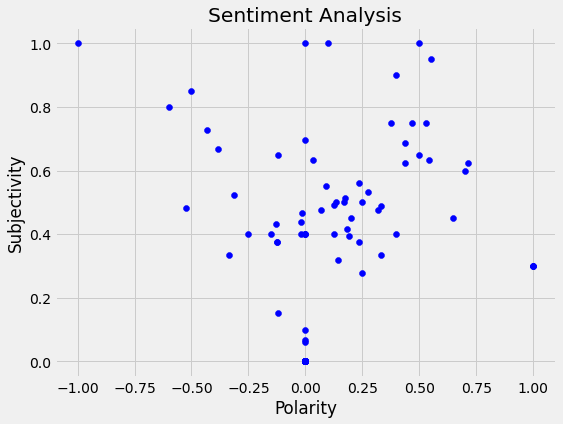

In [ ]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, 100):
  plt.scatter(df['NewPolarity'][i], df['Subjectivity'][i], color='Blue')
  plt.title('Sentiment Analysis')
  plt.xlabel('Polarity')
  plt.ylabel('Subjectivity')
  
plt.show()


In [ ]:
df.shape[0]

219929

Plotting the Subjectivity vs Polarity graph for Nvidia throughout the dataframe

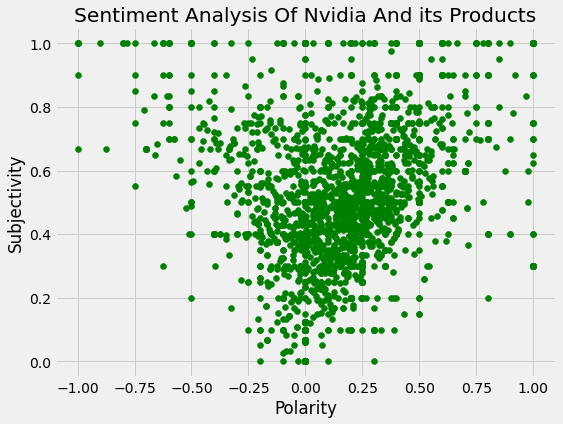

In [ ]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  if (df['file_name'][i]=='Nvidia'):
        plt.scatter(df['NewPolarity'][i], df['Subjectivity'][i], color='Green')

  plt.title('Sentiment Analysis Of Nvidia And its Products')
  plt.xlabel('Polarity')
  plt.ylabel('Subjectivity')
plt.show()

Plotting the Subjectivity vs Polarity graph for Twitch throughout the dataframe

In [ ]:
#Get the percentage of Positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['text']

round(  (ptweets.shape[0] / df.shape[0]) *100, 1)

52.3

In [ ]:
nvidia = ptweets[df.file_name=='Nvidia']
ms = ptweets[df.file_name=='Microsoft']
amd = ptweets[df.file_name=='AMD']
amazon = ptweets[df.file_name=='Amazon']
twitch = ptweets[df.file_name=='Twitch']
apple = ptweets[df.file_name=='Apple']
youtube = ptweets[df.file_name=='Youtube']
tesla = ptweets[df.file_name=='Tesla']
google = ptweets[df.file_name=='Google']
netflix = ptweets[df.file_name=='Netflix']



print("Positive reviews regarding Nvidia and its products: "+str(round(  (nvidia.shape[0] / ptweets.shape[0]) *100,1))+"%")
print("Positive reviews regarding Microsoft and its products: "+str(round(  (ms.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding AMD and its products: "+str(round(  (amd.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Amazon and its products: "+str(round(  (amazon.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Twitch and its products: "+str(round(  (twitch.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Apple and its products: "+str(round(  (apple.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Youtube and its products: "+str(round(  (youtube.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Tesla and its products: "+str(round(  (tesla.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Google and its products: "+str(round(  (google.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Netflix and its products: "+str(round(  (netflix.shape[0] / ptweets.shape[0]) *100, 1))+"%")


Positive reviews regarding Nvidia and its products: 1.5%
Positive reviews regarding Microsoft and its products: 9.5%
Positive reviews regarding AMD and its products: 1.3%
Positive reviews regarding Amazon and its products: 8.8%
Positive reviews regarding Twitch and its products: 17.4%
Positive reviews regarding Apple and its products: 12.5%
Positive reviews regarding Youtube and its products: 14.7%
Positive reviews regarding Tesla and its products: 7.1%
Positive reviews regarding Google and its products: 11.5%
Positive reviews regarding Netflix and its products: 15.7%


In [ ]:
#Get the percentage of Negative tweets
ntweets=df[df.Analysis == 'Negative']
ntweets = ntweets['text']
round(  (ntweets.shape[0] / df.shape[0]) *100, 1)

13.2

In [ ]:
nvidiant = ntweets[df.file_name=='Nvidia']
msnt = ntweets[df.file_name=='Microsoft']
amdnt = ntweets[df.file_name=='AMD']
amazonnt = ntweets[df.file_name=='Amazon']
twitchnt = ntweets[df.file_name=='Twitch']
applent = ntweets[df.file_name=='Apple']
youtubent = ntweets[df.file_name=='Youtube']
teslant = ntweets[df.file_name=='Tesla']
googlent = ntweets[df.file_name=='Google']
netflixnt = ntweets[df.file_name=='Netflix']

print("Negative reviews regarding Nvidia and its products: "+str(round(  (nvidiant.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Microsoft and its products: "+str(round(  (msnt.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding AMD and its products: "+str(round(  (amdnt.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Amazon and its products: "+str(round(  (amazonnt.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Twitch and its products: "+str(round(  (twitchnt.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Apple and its products: "+str(round(  (applent.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Youtube and its products: "+str(round(  (youtubent.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Tesla and its products: "+str(round(  (teslant.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Google and its products: "+str(round(  (googlent.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Netflix and its products: "+str(round(  (netflixnt.shape[0] / ntweets.shape[0]) *100, 1))+"%")


Negative reviews regarding Nvidia and its products: 1.8%
Negative reviews regarding Microsoft and its products: 9.7%
Negative reviews regarding AMD and its products: 0.9%
Negative reviews regarding Amazon and its products: 7.2%
Negative reviews regarding Twitch and its products: 17.5%
Negative reviews regarding Apple and its products: 13.0%
Negative reviews regarding Youtube and its products: 13.5%
Negative reviews regarding Tesla and its products: 8.3%
Negative reviews regarding Google and its products: 9.8%
Negative reviews regarding Netflix and its products: 18.3%


In [ ]:
#Get the percentage of Neutral tweets
netweets=df[df.Analysis == 'Neutral']
netweets = netweets['text']
round(  (netweets.shape[0] / df.shape[0]) *100, 1)

34.4

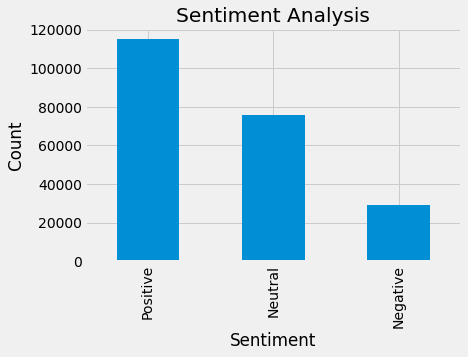

In [ ]:
#Show the value counts

df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar')
#amd.value_counts().plot(kind='bar')


plt.show()


In [ ]:
#positive reviews variables
p_nvidia=round((nvidia.shape[0] / ptweets.shape[0])*100,1)
p_ms=round((ms.shape[0] / ptweets.shape[0])*100,1)
p_amd=round((amd.shape[0] / ptweets.shape[0])*100,1)
p_amz=round((amazon.shape[0] / ptweets.shape[0])*100,1)
p_twitch=round((twitch.shape[0] / ptweets.shape[0])*100,1)
p_apple=round((apple.shape[0] / ptweets.shape[0])*100,1)
p_ytube=round((youtube.shape[0] / ptweets.shape[0])*100,1)
p_tesla=round((tesla.shape[0] / ptweets.shape[0])*100,1)
p_google=round((netflix.shape[0] / ptweets.shape[0])*100,1)
p_netflix=round((netflix.shape[0] / ptweets.shape[0])*100,1)

#negative reviews variables
n_nvidia=round((nvidiant.shape[0] / ntweets.shape[0])*100,1)
n_ms=round((msnt.shape[0] / ntweets.shape[0])*100,1)
n_amd=round((amdnt.shape[0] / ntweets.shape[0])*100,1)
n_amz=round((amazonnt.shape[0] / ntweets.shape[0])*100,1)
n_twitch=round((twitchnt.shape[0] / ntweets.shape[0])*100,1)
n_apple=round((applent.shape[0] / ntweets.shape[0])*100,1)
n_ytube=round((youtubent.shape[0] / ntweets.shape[0])*100,1)
n_tesla=round((teslant.shape[0] / ntweets.shape[0])*100,1)
n_google=round((netflixnt.shape[0] / ntweets.shape[0])*100,1)
n_netflix=round((netflixnt.shape[0] / ntweets.shape[0])*100,1)

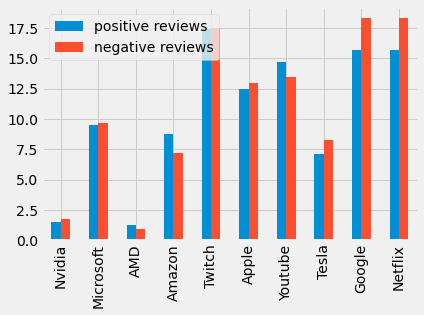

In [ ]:
plotdata = pd.DataFrame({
    "positive reviews":[p_nvidia,p_ms,p_amd,p_amz,p_twitch,p_apple,p_ytube,p_tesla,p_google,p_netflix],
    "negative reviews":[n_nvidia,n_ms,n_amd,n_amz,n_twitch,n_apple,n_ytube,n_tesla,n_google,n_netflix]
    }, 
    index=["Nvidia","Microsoft","AMD","Amazon","Twitch","Apple", "Youtube","Tesla","Google","Netflix"]
)

plotdata.plot(kind="bar")

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.svm import SVR

x = df['text'].head(500)
y = df['NewPolarity'].head(500)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15, random_state=42)

# array1=np.array(x)
# array2=np.array(y)

# array1=array1.reshape(-1,1)
# array2=array2.reshape(-1,1)

# y=y.astype('float')
# print(array1)
# print(array2)

In [ ]:
import joblib
from sklearn.feature_extraction.text import CountVectorizer

#Vectorize text reviews to numbers

vec = CountVectorizer(stop_words='english')
vec.fit(x,y)

vectorizer=vec.transform(x)
print(vectorizer.toarray())
x = vec.fit_transform(x).toarray()

x_test = vec.transform(x_test).toarray()
y=y.astype('float')
x=x.astype('float')
print(x_test)
#print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression


model = MultinomialNB()
model.fit(x,y)

MultinomialNB()

In [ ]:
from sklearn.linear_model import LinearRegression

lireg=LinearRegression() # initialize the model
lireg.fit(x,y) # fit the model
vector=vec.transform(["Amazon is the best in the world"])
y_pred=lireg.predict(vector) # now predict
print(y_pred)
# Taking out the accuracy 

#model.score(x,y)
lireg.score(x,y)

[0.43251676]


1.0

In [ ]:
review1="Amazon is worst company"
review2="I like Google Pixel"
review3="Microsoft is the best place to work"
review4="I dont like being with Salesforce"
vactorize=vec.transform([review1,review2,review3,review4])
print(vactorize)
prediction=lireg.predict(vactorize)
print(prediction)

  (0, 264)	1
  (0, 637)	1
  (0, 3044)	1
  (1, 1280)	1
  (1, 1638)	1
  (2, 410)	1
  (2, 1762)	1
  (2, 2066)	1
  (2, 3034)	1
  (3, 909)	1
  (3, 1638)	1
[0.01341091 0.01169406 0.12985583 0.00661825]


In [ ]:
############Intsall 
#+streamlit
#+pyngrok
#+nohub/background

In [ ]:
!pip install streamlit


In [ ]:
!pip install pyngrok


In [ ]:
!pip install --upgrade streamlit

In [ ]:
%%writefile app.py
import streamlit as st

PAGE_CONFIG = {"page_title":"StColab.io","page_icon":":smiley:","layout":"centered"}
st.set_page_config(**PAGE_CONFIG)

def main():
  st.title("Awesome Streamlit for my bootyful models")
  st.subheader("How to run streamlit from colab")

  menu = ["Home","About"]
  choice = st.sidebar.selectbox('Menu',menu)
  if choice == 'Home':
    st.subheader("Streamlit From Colab")


  if __name__=='__main__':
    main()


Overwriting app.py


In [ ]:
from pyngrok import ngrok





In [ ]:
!streamlit run app.py&>/dev/null&

In [ ]:
!pgrep streamlit

1943


In [ ]:

publ_url = ngrok.connect(port='80')
print(publ_url)

NgrokTunnel: "http://aeb1-104-199-68-117.ngrok.io" -> "http://localhost:80"


In [ ]:
!kill 1902

In [ ]:
#Code completed with 99% accuracy, thankyou for watching...